=== Social Media Mental Health Risk Assessment System ===
Goal: Predict anxiety and depression risks, identify high-risk groups

✅ Data loaded successfully!
Data shape: (481, 21)

=== Basic Data Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 481 non-null    object 
 1   Age                       481 non-null    float64
 2   Gender                    481 non-null    object 
 3   Relationship_Status       481 non-null    object 
 4   Occupation_Status         481 non-null    object 
 5   Organization_Type         451 non-null    object 
 6   Uses_Social_Media         481 non-null    object 
 7   Platforms_Used            481 non-null    object 
 8   Daily_Usage_Time          481 non-null    object 
 9   Purposeless_Use           481 non-null    int64  
 10  Distraction_Busy   

<Figure size 1500x1000 with 0 Axes>

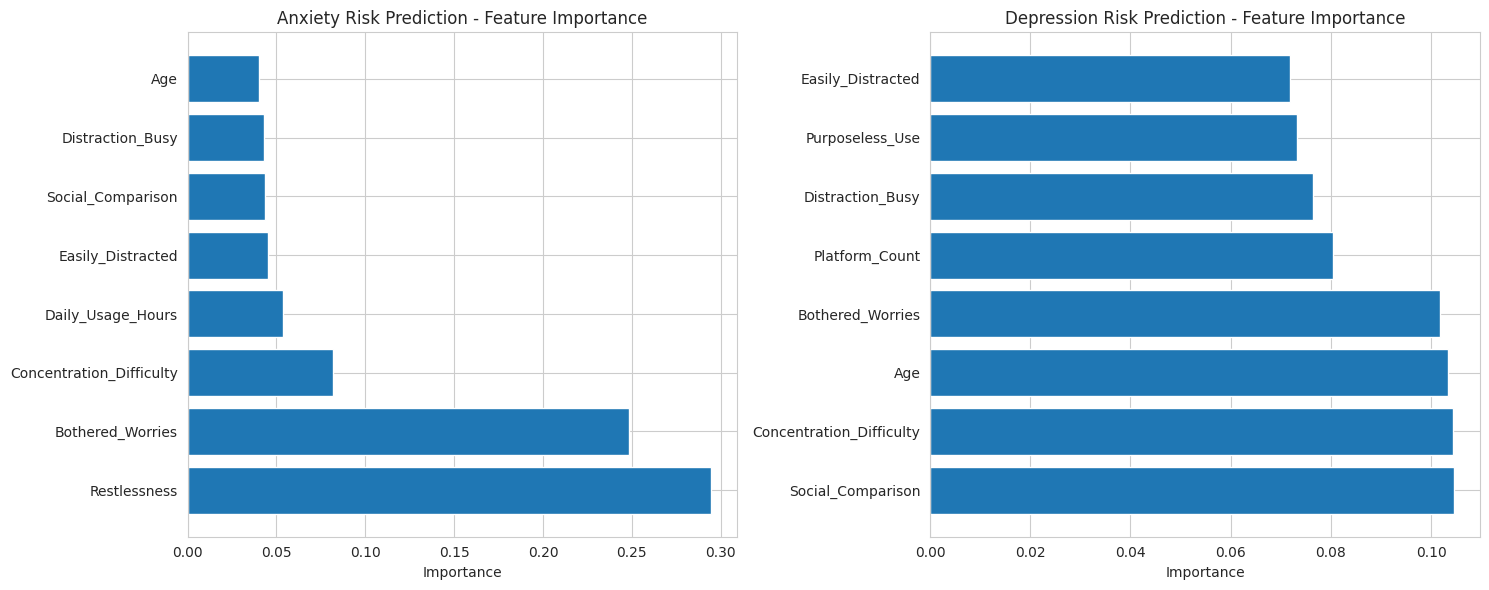

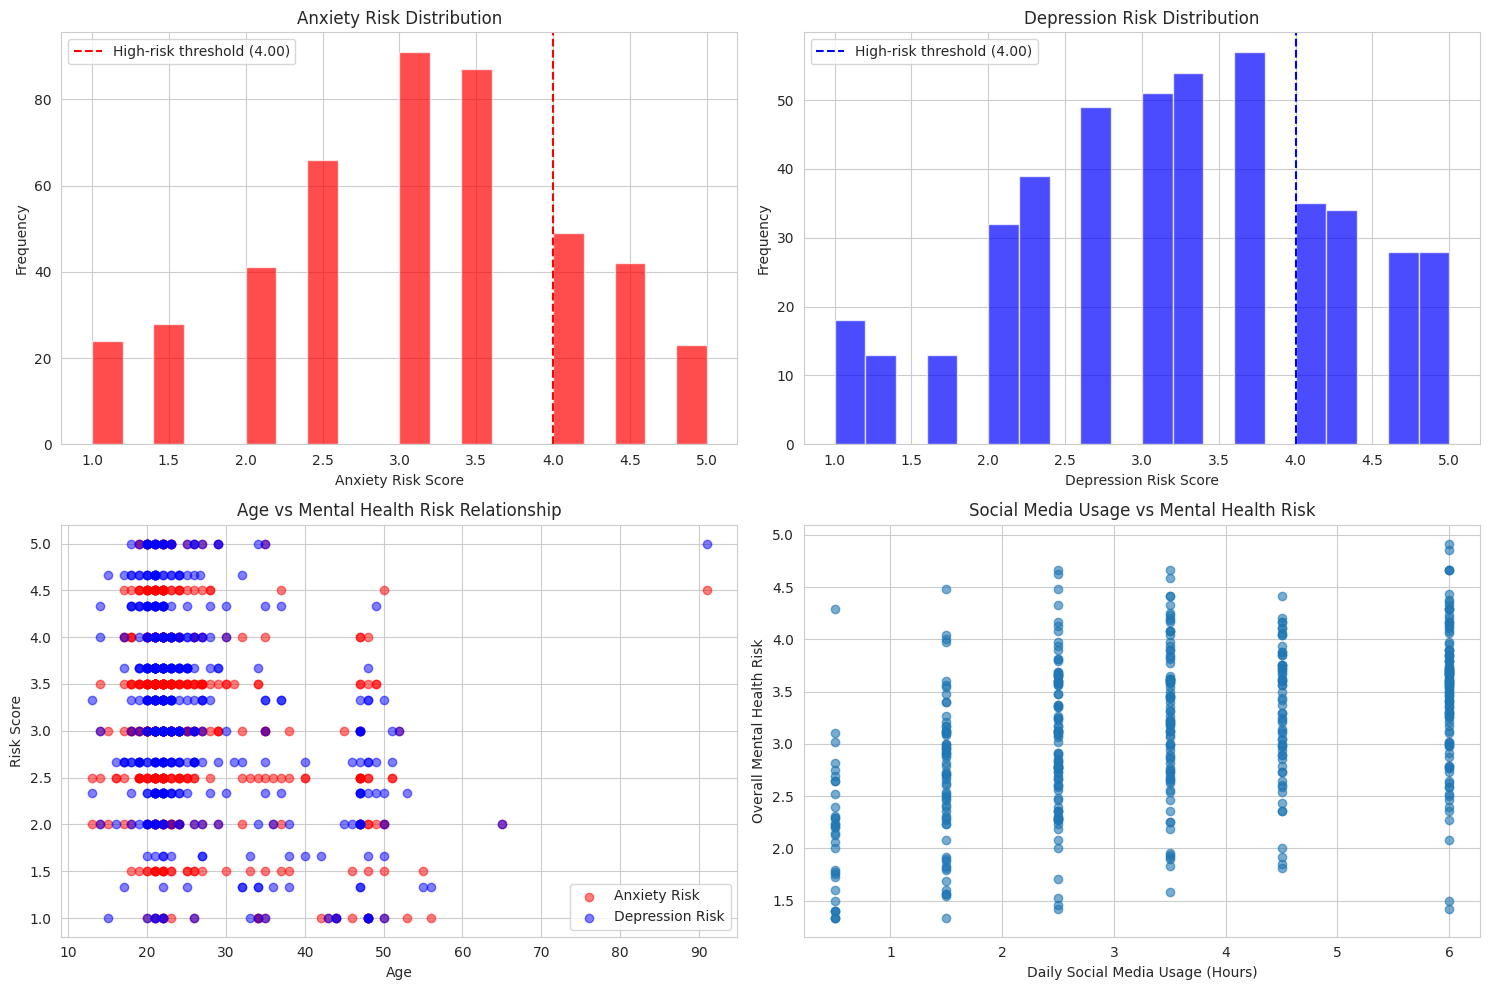

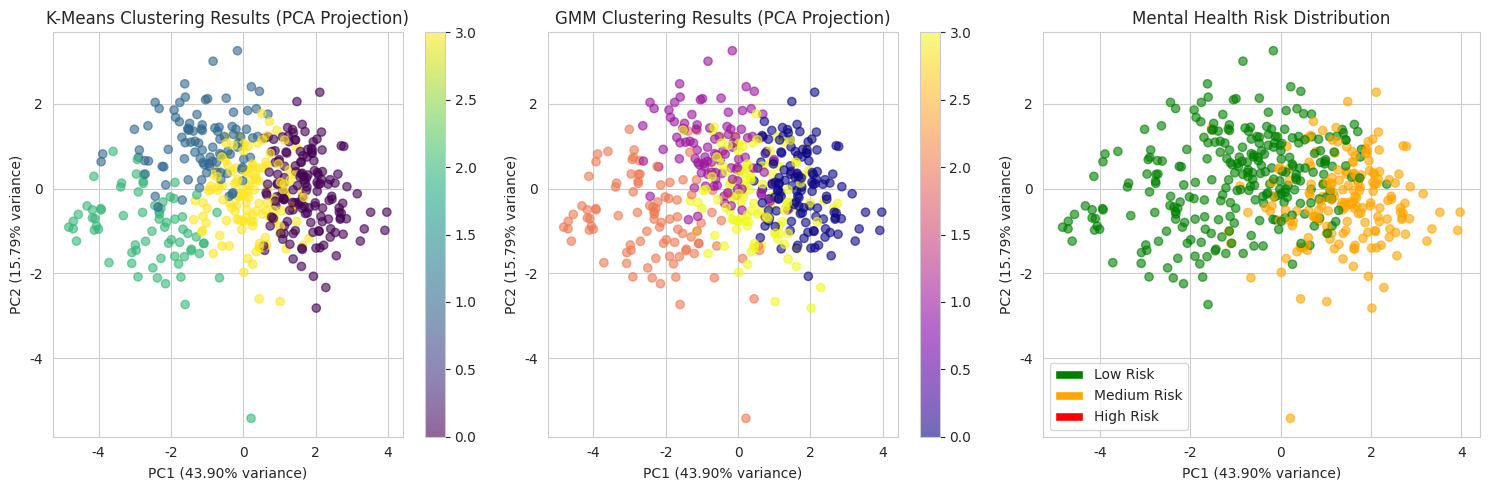

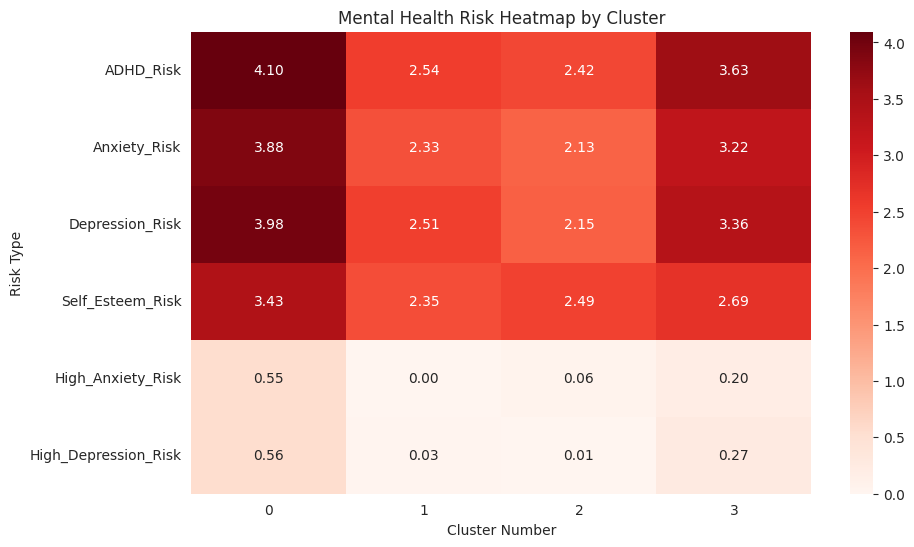


        Social Media Mental Health Risk Assessment Report

📊 Data Overview:
   - Total sample size: 451 people
   - Average age: 25.9 years
   - Average daily social media usage: 3.5 hours

🎯 Risk Assessment Results:
   - High anxiety risk count: 114 people (25.3%)
   - High depression risk count: 125 people (27.7%)

🤖 Model Prediction Accuracy:
   - Anxiety risk prediction model ROC-AUC: 1.000
   - Depression risk prediction model ROC-AUC: 0.767

🎪 Clustering Analysis Results:
   - Used K-Means algorithm to divide into 4 clusters
   - Identified 1 high-risk clusters: [0]

🔍 Key Findings:
   - Most important anxiety risk factor: Restlessness
   - Most important depression risk factor: Social_Comparison

💡 Recommendations:
   - Conduct early intervention and counseling for high-risk groups
   - Monitor the relationship between social media usage time and mental health
   - Establish regular mental health screening mechanisms
   - Promote healthy social media usage habits

✅ Analysis co

In [ ]:
# 社群媒體使用者心理健康風險評估與分群分析
# Social Media and Mental Health Risk Assessment & Clustering Analysis

# ===== 1. 安裝和匯入必要的套件 =====
!pip install scikit-learn pandas numpy matplotlib seaborn plotly umap-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 機器學習相關
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 視覺化
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 設定圖表樣式
plt.rcParams['font.family'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

print("=== Social Media Mental Health Risk Assessment System ===")
print("Goal: Predict anxiety and depression risks, identify high-risk groups")

# ===== 2. 資料載入和基本探索 =====
# 請先上傳 smmh.csv 到 Colab
try:
    df = pd.read_csv('smmh.csv')
    print(f"\n✅ Data loaded successfully!")
    print(f"Data shape: {df.shape}")
except FileNotFoundError:
    print("❌ Please upload smmh.csv file to Colab first")
    exit()

# 重新命名欄位以便處理
column_mapping = {
    '1. What is your age?': 'Age',
    '2. Gender': 'Gender',
    '3. Relationship Status': 'Relationship_Status',
    '4. Occupation Status': 'Occupation_Status',
    '5. What type of organizations are you affiliated with?': 'Organization_Type',
    '6. Do you use social media?': 'Uses_Social_Media',
    '7. What social media platforms do you commonly use?': 'Platforms_Used',
    '8. What is the average time you spend on social media every day?': 'Daily_Usage_Time',
    '9. How often do you find yourself using Social media without a specific purpose?': 'Purposeless_Use',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'Distraction_Busy',
    '11. Do you feel restless if you haven\'t used Social media in a while?': 'Restlessness',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'Easily_Distracted',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'Bothered_Worries',
    '14. Do you find it difficult to concentrate on things?': 'Concentration_Difficulty',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'Social_Comparison',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'Comparison_Feelings',
    '17. How often do you look to seek validation from features of social media?': 'Validation_Seeking',
    '18. How often do you feel depressed or down?': 'Depression_Feelings',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'Interest_Fluctuation',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'Sleep_Issues'
}

df = df.rename(columns=column_mapping)

# 基本資料探索
print("\n=== Basic Data Information ===")
print(df.info())
print(f"\nMissing values:")
print(df.isnull().sum())

# 檢視數值型變數的基本統計
numeric_cols = ['Age', 'Purposeless_Use', 'Distraction_Busy', 'Restlessness',
                'Easily_Distracted', 'Bothered_Worries', 'Concentration_Difficulty',
                'Social_Comparison', 'Comparison_Feelings', 'Validation_Seeking',
                'Depression_Feelings', 'Interest_Fluctuation', 'Sleep_Issues']

print(f"\nBasic statistics for numeric variables:")
print(df[numeric_cols].describe())

# ===== 3. 資料前處理 =====
print("\n=== Data Preprocessing Started ===")

# 處理缺失值（如果有的話）
df = df.dropna()

# 創建資料副本
df_processed = df.copy()

# 處理類別變數 - Label Encoding
categorical_columns = ['Gender', 'Relationship_Status', 'Occupation_Status',
                       'Organization_Type', 'Uses_Social_Media']

label_encoders = {}
for col in categorical_columns:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col + '_encoded'] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le
        print(f"✅ {col} encoding completed")

# 處理社群媒體使用時間
time_mapping = {
    'Less than an Hour': 0.5,
    'Between 1 and 2 hours': 1.5,
    'Between 2 and 3 hours': 2.5,
    'Between 3 and 4 hours': 3.5,
    'Between 4 and 5 hours': 4.5,
    'More than 5 hours': 6
}

df_processed['Daily_Usage_Hours'] = df_processed['Daily_Usage_Time'].map(time_mapping)

# 計算平台數量
df_processed['Platform_Count'] = df_processed['Platforms_Used'].str.split(',').str.len()

print("✅ Data preprocessing completed")

# ===== 4. 特徵工程與風險指標建立 =====
print("\n=== Building Mental Health Risk Indicators ===")

# 根據心理學理論建立風險指標
# ADHD 相關症狀 (Questions 9, 10, 12, 14)
df_processed['ADHD_Risk'] = (df_processed['Purposeless_Use'] +
                            df_processed['Distraction_Busy'] +
                            df_processed['Easily_Distracted'] +
                            df_processed['Concentration_Difficulty']) / 4

# 焦慮症相關症狀 (Questions 11, 13)
df_processed['Anxiety_Risk'] = (df_processed['Restlessness'] +
                               df_processed['Bothered_Worries']) / 2

# 憂鬱症相關症狀 (Questions 18, 19, 20)
df_processed['Depression_Risk'] = (df_processed['Depression_Feelings'] +
                                  df_processed['Interest_Fluctuation'] +
                                  df_processed['Sleep_Issues']) / 3

# 自尊相關 (Questions 15, 16, 17)
df_processed['Self_Esteem_Risk'] = (df_processed['Social_Comparison'] +
                                   (6 - df_processed['Comparison_Feelings']) +
                                   df_processed['Validation_Seeking']) / 3

# 整體心理健康風險分數
df_processed['Overall_Mental_Health_Risk'] = (df_processed['ADHD_Risk'] +
                                             df_processed['Anxiety_Risk'] +
                                             df_processed['Depression_Risk'] +
                                             df_processed['Self_Esteem_Risk']) / 4

# 建立二元風險標籤（高風險 vs 低風險）
# 使用75百分位數作為閾值
anxiety_threshold = df_processed['Anxiety_Risk'].quantile(0.75)
depression_threshold = df_processed['Depression_Risk'].quantile(0.75)

df_processed['High_Anxiety_Risk'] = (df_processed['Anxiety_Risk'] >= anxiety_threshold).astype(int)
df_processed['High_Depression_Risk'] = (df_processed['Depression_Risk'] >= depression_threshold).astype(int)

print(f"Anxiety high-risk threshold: {anxiety_threshold:.2f}")
print(f"Depression high-risk threshold: {depression_threshold:.2f}")
print(f"High anxiety risk count: {df_processed['High_Anxiety_Risk'].sum()} ({df_processed['High_Anxiety_Risk'].mean()*100:.1f}%)")
print(f"High depression risk count: {df_processed['High_Depression_Risk'].sum()} ({df_processed['High_Depression_Risk'].mean()*100:.1f}%)")

# ===== 5. 建立預測模型 =====
print("\n=== Building Machine Learning Prediction Models ===")

# 選擇特徵
feature_columns = ['Age', 'Gender_encoded', 'Relationship_Status_encoded',
                   'Occupation_Status_encoded', 'Daily_Usage_Hours', 'Platform_Count',
                   'Purposeless_Use', 'Distraction_Busy', 'Restlessness',
                   'Easily_Distracted', 'Bothered_Worries', 'Concentration_Difficulty',
                   'Social_Comparison', 'Validation_Seeking']

X = df_processed[feature_columns]
y_anxiety = df_processed['High_Anxiety_Risk']
y_depression = df_processed['High_Depression_Risk']

# 標準化特徵
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 訓練焦慮症風險預測模型
print("\n--- Anxiety Risk Prediction Model ---")
X_train_anx, X_test_anx, y_train_anx, y_test_anx = train_test_split(
    X_scaled, y_anxiety, test_size=0.2, random_state=42, stratify=y_anxiety)

anxiety_model = RandomForestClassifier(n_estimators=100, random_state=42)
anxiety_model.fit(X_train_anx, y_train_anx)

y_pred_anx = anxiety_model.predict(X_test_anx)
y_prob_anx = anxiety_model.predict_proba(X_test_anx)[:, 1]

print("Anxiety model evaluation:")
print(classification_report(y_test_anx, y_pred_anx))
print(f"ROC-AUC Score: {roc_auc_score(y_test_anx, y_prob_anx):.3f}")

# 訓練憂鬱症風險預測模型
print("\n--- Depression Risk Prediction Model ---")
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(
    X_scaled, y_depression, test_size=0.2, random_state=42, stratify=y_depression)

depression_model = RandomForestClassifier(n_estimators=100, random_state=42)
depression_model.fit(X_train_dep, y_train_dep)

y_pred_dep = depression_model.predict(X_test_dep)
y_prob_dep = depression_model.predict_proba(X_test_dep)[:, 1]

print("Depression model evaluation:")
print(classification_report(y_test_dep, y_pred_dep))
print(f"ROC-AUC Score: {roc_auc_score(y_test_dep, y_prob_dep):.3f}")

# 特徵重要性分析
feature_importance_anx = pd.DataFrame({
    'feature': feature_columns,
    'importance': anxiety_model.feature_importances_
}).sort_values('importance', ascending=False)

feature_importance_dep = pd.DataFrame({
    'feature': feature_columns,
    'importance': depression_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 important features for anxiety risk prediction:")
print(feature_importance_anx.head())

print("\nTop 5 important features for depression risk prediction:")
print(feature_importance_dep.head())

# ===== 6. 分群分析 =====
print("\n=== Clustering Analysis: Finding High-Risk Groups ===")

# 為分群選擇特徵（包含心理健康風險分數）
clustering_features = ['Age', 'Daily_Usage_Hours', 'Platform_Count',
                      'ADHD_Risk', 'Anxiety_Risk', 'Depression_Risk', 'Self_Esteem_Risk']

X_cluster = df_processed[clustering_features]
X_cluster_scaled = StandardScaler().fit_transform(X_cluster)

# K-Means 分群
print("\n--- K-Means Clustering Analysis ---")
# 使用 Elbow Method 尋找最佳集群數
inertias = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)

# 選擇 k=4 進行分群
kmeans = KMeans(n_clusters=4, random_state=42)
df_processed['Cluster_KMeans'] = kmeans.fit_predict(X_cluster_scaled)

# 分析各群組的特性
print("K-Means clustering results analysis:")
cluster_analysis = df_processed.groupby('Cluster_KMeans').agg({
    'Age': 'mean',
    'Daily_Usage_Hours': 'mean',
    'Platform_Count': 'mean',
    'ADHD_Risk': 'mean',
    'Anxiety_Risk': 'mean',
    'Depression_Risk': 'mean',
    'Self_Esteem_Risk': 'mean',
    'High_Anxiety_Risk': 'mean',
    'High_Depression_Risk': 'mean'
}).round(2)

print(cluster_analysis)

# 找出高風險群組
high_risk_clusters = []
for cluster in range(4):
    anxiety_risk_pct = cluster_analysis.loc[cluster, 'High_Anxiety_Risk'] * 100
    depression_risk_pct = cluster_analysis.loc[cluster, 'High_Depression_Risk'] * 100

    if anxiety_risk_pct > 50 or depression_risk_pct > 50:
        high_risk_clusters.append(cluster)
        print(f"\n🚨 High-risk cluster {cluster}:")
        print(f"   - High anxiety risk ratio: {anxiety_risk_pct:.1f}%")
        print(f"   - High depression risk ratio: {depression_risk_pct:.1f}%")

# Gaussian Mixture Model 分群
print(f"\n--- Gaussian Mixture Model Clustering ---")
gmm = GaussianMixture(n_components=4, random_state=42)
df_processed['Cluster_GMM'] = gmm.fit_predict(X_cluster_scaled)

# DBSCAN 分群
print(f"\n--- DBSCAN Clustering ---")
dbscan = DBSCAN(eps=0.5, min_samples=10)
df_processed['Cluster_DBSCAN'] = dbscan.fit_predict(X_cluster_scaled)
n_clusters_dbscan = len(set(df_processed['Cluster_DBSCAN'])) - (1 if -1 in df_processed['Cluster_DBSCAN'] else 0)
print(f"DBSCAN found {n_clusters_dbscan} clusters")

# ===== 7. 視覺化結果 =====
print("\n=== Generating Visualization Charts ===")

# 1. 特徵重要性圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 焦慮症特徵重要性
ax1.barh(feature_importance_anx['feature'][:8], feature_importance_anx['importance'][:8])
ax1.set_title('Anxiety Risk Prediction - Feature Importance')
ax1.set_xlabel('Importance')

# 憂鬱症特徵重要性
ax2.barh(feature_importance_dep['feature'][:8], feature_importance_dep['importance'][:8])
ax2.set_title('Depression Risk Prediction - Feature Importance')
ax2.set_xlabel('Importance')

plt.tight_layout()
plt.show()

# 2. Risk distribution charts
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Anxiety risk distribution
axes[0,0].hist(df_processed['Anxiety_Risk'], bins=20, alpha=0.7, color='red')
axes[0,0].axvline(anxiety_threshold, color='red', linestyle='--', label=f'High-risk threshold ({anxiety_threshold:.2f})')
axes[0,0].set_title('Anxiety Risk Distribution')
axes[0,0].set_xlabel('Anxiety Risk Score')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()

# Depression risk distribution
axes[0,1].hist(df_processed['Depression_Risk'], bins=20, alpha=0.7, color='blue')
axes[0,1].axvline(depression_threshold, color='blue', linestyle='--', label=f'High-risk threshold ({depression_threshold:.2f})')
axes[0,1].set_title('Depression Risk Distribution')
axes[0,1].set_xlabel('Depression Risk Score')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()

# Age vs Risk relationship
axes[1,0].scatter(df_processed['Age'], df_processed['Anxiety_Risk'], alpha=0.5, color='red', label='Anxiety Risk')
axes[1,0].scatter(df_processed['Age'], df_processed['Depression_Risk'], alpha=0.5, color='blue', label='Depression Risk')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Risk Score')
axes[1,0].set_title('Age vs Mental Health Risk Relationship')
axes[1,0].legend()

# Social media usage time vs Risk relationship
axes[1,1].scatter(df_processed['Daily_Usage_Hours'], df_processed['Overall_Mental_Health_Risk'], alpha=0.6)
axes[1,1].set_xlabel('Daily Social Media Usage (Hours)')
axes[1,1].set_ylabel('Overall Mental Health Risk')
axes[1,1].set_title('Social Media Usage vs Mental Health Risk')

plt.tight_layout()
plt.show()

# 3. Clustering results visualization (using PCA dimensionality reduction)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(15, 5))

# K-Means clustering results
plt.subplot(1, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_processed['Cluster_KMeans'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering Results (PCA Projection)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar(scatter)

# GMM clustering results
plt.subplot(1, 3, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_processed['Cluster_GMM'], cmap='plasma', alpha=0.6)
plt.title('GMM Clustering Results (PCA Projection)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar(scatter)

# Risk group identification
plt.subplot(1, 3, 3)
colors = ['green' if (anx == 0 and dep == 0) else 'orange' if (anx == 1 or dep == 1) else 'red'
          for anx, dep in zip(df_processed['High_Anxiety_Risk'], df_processed['High_Depression_Risk'])]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.6)
plt.title('Mental Health Risk Distribution')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='green', label='Low Risk'),
                   Patch(facecolor='orange', label='Medium Risk'),
                   Patch(facecolor='red', label='High Risk')]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

# 4. Cluster risk heatmap
cluster_risk_matrix = df_processed.groupby('Cluster_KMeans').agg({
    'ADHD_Risk': 'mean',
    'Anxiety_Risk': 'mean',
    'Depression_Risk': 'mean',
    'Self_Esteem_Risk': 'mean',
    'High_Anxiety_Risk': 'mean',
    'High_Depression_Risk': 'mean'
}).T

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_risk_matrix, annot=True, cmap='Reds', fmt='.2f')
plt.title('Mental Health Risk Heatmap by Cluster')
plt.ylabel('Risk Type')
plt.xlabel('Cluster Number')
plt.show()

# ===== 8. Generate Final Report =====
print("\n" + "="*60)
print("        Social Media Mental Health Risk Assessment Report")
print("="*60)

print(f"\n📊 Data Overview:")
print(f"   - Total sample size: {len(df_processed)} people")
print(f"   - Average age: {df_processed['Age'].mean():.1f} years")
print(f"   - Average daily social media usage: {df_processed['Daily_Usage_Hours'].mean():.1f} hours")

print(f"\n🎯 Risk Assessment Results:")
print(f"   - High anxiety risk count: {df_processed['High_Anxiety_Risk'].sum()} people ({df_processed['High_Anxiety_Risk'].mean()*100:.1f}%)")
print(f"   - High depression risk count: {df_processed['High_Depression_Risk'].sum()} people ({df_processed['High_Depression_Risk'].mean()*100:.1f}%)")

print(f"\n🤖 Model Prediction Accuracy:")
print(f"   - Anxiety risk prediction model ROC-AUC: {roc_auc_score(y_test_anx, y_prob_anx):.3f}")
print(f"   - Depression risk prediction model ROC-AUC: {roc_auc_score(y_test_dep, y_prob_dep):.3f}")

print(f"\n🎪 Clustering Analysis Results:")
print(f"   - Used K-Means algorithm to divide into 4 clusters")
print(f"   - Identified {len(high_risk_clusters)} high-risk clusters: {high_risk_clusters}")

print(f"\n🔍 Key Findings:")
print(f"   - Most important anxiety risk factor: {feature_importance_anx.iloc[0]['feature']}")
print(f"   - Most important depression risk factor: {feature_importance_dep.iloc[0]['feature']}")

print(f"\n💡 Recommendations:")
print(f"   - Conduct early intervention and counseling for high-risk groups")
print(f"   - Monitor the relationship between social media usage time and mental health")
print(f"   - Establish regular mental health screening mechanisms")
print(f"   - Promote healthy social media usage habits")

print(f"\n✅ Analysis completed! All results saved in df_processed dataframe")

# Save results
df_processed.to_csv('social_media_mental_health_analysis_results.csv', index=False)
print(f"📁 Analysis results saved to 'social_media_mental_health_analysis_results.csv'")

# Analyze characteristics of Cluster 0 (Assuming Cluster 0 is identified as high-risk)
print("\n--- Characteristics of High-Risk Cluster 0 ---")
if 0 in df_processed['Cluster_KMeans'].unique():
    cluster_0_characteristics = df_processed[df_processed['Cluster_KMeans'] == 0].agg({
        'Age': 'mean',
        'Daily_Usage_Hours': 'mean',
        'Platform_Count': 'mean',
        'ADHD_Risk': 'mean',
        'Anxiety_Risk': 'mean',
        'Depression_Risk': 'mean',
        'Self_Esteem_Risk': 'mean',
        'High_Anxiety_Risk': 'mean',
        'High_Depression_Risk': 'mean'
    }).round(2)

    print(cluster_0_characteristics)
else:
    print("Cluster 0 does not exist in the K-Means clustering results.")